# Multimedia Security and Privacy
## TP 5
Tientso Ning

In [2]:
import numpy as np
from scipy.stats import norm
from scipy import ndimage
import cv2
import matplotlib.pyplot as plt

Thanks Obama


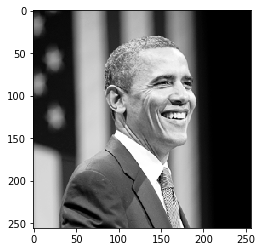

In [128]:
#read the image as grayscale
x = cv2.imread("obama.png", 0)
plt.imshow(x, cmap="Greys_r")
print("Thanks Obama")

In [238]:
#define a function that embeds a watermark to an image and returns the image
def create_wm (size, density, strength):
    
    #create a uniform distributed -1/1s
    w_ = np.random.randint(0,2,(size))
    w_[w_ < 1] = -strength
    w_[w_ == 1] = strength
    
    #random sampling of density
    assert density > 0 and density < 1
    q_ = np.copy(w_).flatten()
    for i in range(0,len(q_)):
        roll = np.random.random()
        if roll > density:
            q_[i] = 0
    q_ = np.reshape(q_, w_.shape)
    w_ = q_
    return w_

def rho_non_blind (y, x, w_, z, density):
    '''
    given an embedded-watermarked image y, find the rho value with non-blind
    '''
    v = y + z
    w_nonblind = v-x
    return np.sum(np.multiply(w_nonblind, w_))/(w_.shape[0]*w_.shape[1]*density)

def rho_blind (y, w_, z, density):
    '''
    given an embedded-watermarked image y, find the rho value with blind
    '''
    v = y + z
    v_ = ndimage.uniform_filter(v, size=4)
    w_blind = v - v_
    return np.sum(np.multiply(w_blind, w_))/(w_.shape[0]*w_.shape[1]*density)

In [249]:
#determine numerically probability of false, miss, and detection

#parameters
thresholds = np.linspace(-10, 10, num=100)
    
#determine pm, pf, pd for thresholds

#pm
pm_wm_nb = []
for t in thresholds:
    
    count = 0 #reset count
    #create 100 trials of watermarked
    w_ = create_wm(x.shape, 0.5, 1)
    y = np.copy(x) + np.copy(w_)
    rhos_wm_nb = []
    for i in range(100):
        z = np.random.normal(0, 50, (x.shape))
        rhos_wm_nb.append(rho_non_blind(y,x,w_,z,0.1))

    #get counts
    for i in range(len(rhos_wm_nb)):
        if rhos_wm_nb[i] < t:
            count += 1

    #determine pm
    pm_wm_nb.append(count/len(rhos_wm_nb))
    
#pf
pf_wm_nb = []
for t in thresholds:

    count = 0 #reset count

    #create 100 trials of non-watermarked
    rhos_no_nb = []
    y = np.copy(x)
    for i in range(100):
        z = np.random.normal(0, 50, (x.shape))
        rhos_no_nb.append(rho_non_blind(y,x,w_,z,0.1))

    #get counts
    for i in range(len(rhos_no_nb)):
        if rhos_no_nb[i] > t:
            count += 1

    #determine pm
    pf_wm_nb.append(count/len(rhos_no_nb))

#pd
pd_wm_nb = np.ones(len(pm_wm_nb))-pm_wm_nb

Text(0, 0.5, 'Percentage')

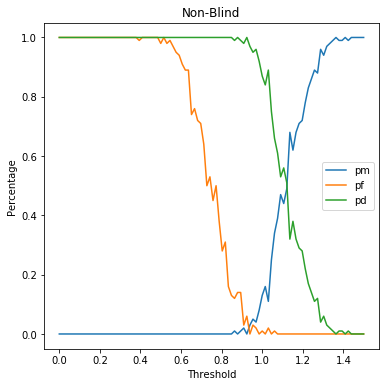

In [256]:
#plot the estimated curve of probabilities as a function of T_rho_non-blind
plt.figure(figsize=(6,6))
plt.plot(thresholds,pm_wm_nb, label="pm")
plt.plot(thresholds,pf_wm_nb, label="pf")
plt.plot(thresholds,pd_wm_nb, label="pd")
plt.legend()
plt.title("Non-Blind")
plt.xlabel("Threshold")
plt.ylabel("Percentage")

Text(0, 0.5, 'pm')

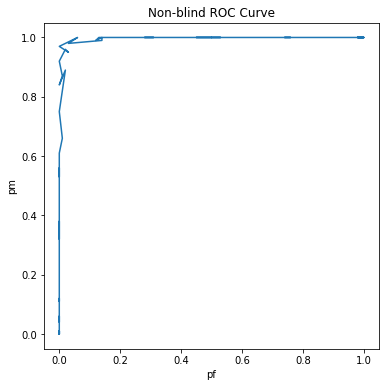

In [257]:
#calculate the ROC curve
plt.figure(figsize=(6,6))
plt.plot(pf_wm_nb,pd_wm_nb)
plt.title("Non-blind ROC Curve")
plt.xlabel("pf")
plt.ylabel("pm")

In [168]:
#determine the values in the table
def table(x, noise, density, strength, J):
    '''
    x is the image
    noise is the noise variation
    density is the density of the watermark
    strength is the strength of the watermark
    J is the number of iterations
    '''
    
    #paramters
    rho_h0 = []
    rho_h1 = []
    var_h0 = []
    var_h1 = []
    
    #create the samples
    for j in range(J):
        
        #create the watermark
        w_ = create_wm(x.shape, density, strength)

        #create noise
        z = np.random.normal(0, noise, (x.shape))
        
        rho_h0.append(rho_non_blind(x, x, w_, z, density)) #the y calc is done in rho function
        rho_h1.append(rho_non_blind(x+w_, x, w_, z, density))

    #determine mu_h0
    mu_h0 = np.sum(rho_h0)/J

    #determine mu_h1
    mu_h1 = np.sum(rho_h1)/J
    
    #create the samples
    for j in range(J):
        
        #create the watermark
        w_ = create_wm(x.shape, density, strength)

        #create noise
        z = np.random.normal(0, noise, (x.shape))
        
        var_h0.append((rho_non_blind(x, x, w_, z, density)-mu_h0)**2)
        var_h1.append((rho_non_blind(x+w_, x, w_, z, density)-mu_h1)**2)
    
    #determine var_h0
    variance_h0 = np.sum(var_h0)/J

    #determine var_h1
    variance_h1 = np.sum(var_h1)/J
    
    return mu_h0, mu_h1, variance_h0, variance_h1
        

In [169]:
#get values
print("Non-blind Values")
print("===")
print("Noise 50, Density 0.1, Strength 1")
a,b,c,d = table(x,50,0.1,1,100)
print(a,b,c,d)

print("===")
print("Noise 50, Density 0.1, Strength 5")
a,b,c,d = table(x,50,0.1,5,100)
print(a,b,c,d)

print("===")
print("Noise 50, Density 0.3, Strength 1")
a,b,c,d = table(x,50,0.3,1,100)
print(a,b,c,d)

print("===")
print("Noise 50, Density 0.3, Strength 5")
a,b,c,d = table(x,50,0.3,5,100)
print(a,b,c,d)


print("===")
print("Noise 100, Density 0.1, Strength 1")
a,b,c,d = table(x,100,0.1,1,100)
print(a,b,c,d)

print("===")
print("Noise 100, Density 0.1, Strength 5")
a,b,c,d = table(x,100,0.1,5,100)
print(a,b,c,d)

print("===")
print("Noise 100, Density 0.3, Strength 1")
a,b,c,d = table(x,100,0.3,1,100)
print(a,b,c,d)

print("===")
print("Noise 100, Density 0.3, Strength 5")
a,b,c,d = table(x,100,0.3,5,100)
print(a,b,c,d)

Non-blind Values
===
Noise 50, Density 0.1, Strength 1
0.0009015448848076798 0.11199824491735975 0.006209838189967388 0.006221126544155941
===
Noise 50, Density 0.1, Strength 5
-0.02405257365770834 2.747528440339687 0.12117326812421497 0.12401905815713343
===
Noise 50, Density 0.3, Strength 1
-0.00232679228559484 0.4263071973209901 0.026414078214728094 0.02644429406507942
===
Noise 50, Density 0.3, Strength 5
-0.009914290979656112 10.710038973529274 0.6568489162724849 0.6508978594000091
===
Noise 100, Density 0.1, Strength 1
0.004901950016111933 0.11592964641368136 0.017311614004218993 0.01728479952186086
===
Noise 100, Density 0.1, Strength 5
0.02464539915956229 2.8028724635041793 0.566504659396851 0.5690239613029733
===
Noise 100, Density 0.3, Strength 1
0.026515856292469876 0.4554114251401262 0.07579068282046927 0.07572325850287885
===
Noise 100, Density 0.3, Strength 5
0.1323424920065069 10.841609154604164 3.0439174229938475 3.0155781511349526


Here, we can see that the higher the strength of the watermark, we can see easy separability in the rho values (for instance, 0.024 vs 2.8 or even 0.13 vs 10.841). However, we know that this will tradeoff with visibility of our model (and thus security). An increase in density showed an increase in variance.

In [259]:
#determine numerically probability of false, miss, and detection

#parameters
thresholds = np.linspace(-10, 10, num=100)
    
#determine pm, pf, pd for thresholds

#pm
pm_wm_b = []
for t in thresholds:
    
    count = 0 #reset count
    #create 100 trials of watermarked
    w_ = create_wm(x.shape, 0.5, 1)
    y = np.copy(x) + np.copy(w_)
    rhos_wm_b = []
    for i in range(100):
        z = np.random.normal(0, 50, (x.shape))
        rhos_wm_b.append(rho_blind(y,w_,z,0.5))

    #get counts
    for i in range(len(rhos_wm_b)):
        if rhos_wm_b[i] < t:
            count += 1

    #determine pm
    pm_wm_b.append(count/len(rhos_wm_b))
    
#pf
pf_wm_b = []
for t in thresholds:

    count = 0 #reset count

    #create 100 trials of non-watermarked
    rhos_no_b = []
    y = np.copy(x)
    for i in range(100):
        z = np.random.normal(0, 50, (x.shape))
        rhos_no_b.append(rho_blind(y,w_,z,0.5))

    #get counts
    for i in range(len(rhos_no_b)):
        if rhos_no_b[i] > t:
            count += 1

    #determine pm
    pf_wm_b.append(count/len(rhos_no_b))

#pd
pd_wm_b = np.ones(len(pm_wm_b))-pm_wm_b

Text(0, 0.5, 'Percentage')

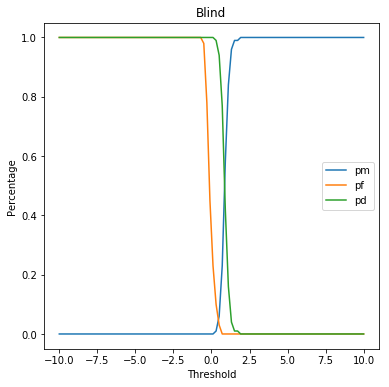

In [260]:
#plot the estimated curve of probabilities as a function of T_rho_blind
plt.figure(figsize=(6,6))
plt.plot(thresholds,pm_wm_b, label="pm")
plt.plot(thresholds,pf_wm_b, label="pf")
plt.plot(thresholds,pd_wm_b, label="pd")
plt.legend()
plt.title("Blind")
plt.xlabel("Threshold")
plt.ylabel("Percentage")

Text(0, 0.5, 'pd')

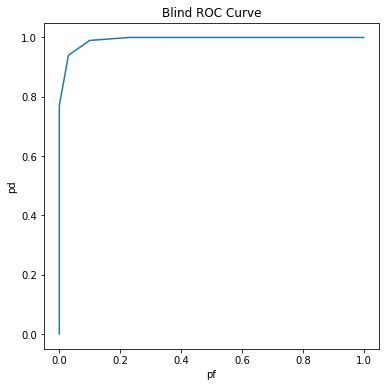

In [263]:
#calculate the ROC curve
plt.figure(figsize=(6,6))
plt.plot(pf_wm_b,pd_wm_b)
plt.title("Blind ROC Curve")
plt.xlabel("pf")
plt.ylabel("pd")

In [173]:
def table_blind(x, noise, density, strength, J):
    '''
    x is the image
    noise is the noise variation
    density is the density of the watermark
    strength is the strength of the watermark
    J is the number of iterations
    '''
    
    #paramters
    rho_h0 = []
    rho_h1 = []
    var_h0 = []
    var_h1 = []
    
    #create the samples
    for j in range(J):
        
        #create the watermark
        w_ = create_wm(x.shape, density, strength)

        #create noise
        z = np.random.normal(0, noise, (x.shape))
        
        rho_h0.append(rho_blind(x, w_, z, density)) #the y calc is done in rho function
        rho_h1.append(rho_blind(x+w_, w_, z, density))

    #determine mu_h0
    mu_h0 = np.sum(rho_h0)/J

    #determine mu_h1
    mu_h1 = np.sum(rho_h1)/J
    
    #create the samples
    for j in range(J):
        
        #create the watermark
        w_ = create_wm(x.shape, density, strength)

        #create noise
        z = np.random.normal(0, noise, (x.shape))
        
        var_h0.append((rho_blind(x, w_, z, density)-mu_h0)**2)
        var_h1.append((rho_blind(x+w_, w_, z, density)-mu_h1)**2)
    
    #determine var_h0
    variance_h0 = np.sum(var_h0)/J

    #determine var_h1
    variance_h1 = np.sum(var_h1)/J
    
    return mu_h0, mu_h1, variance_h0, variance_h1

In [174]:
#get values
print("Blind Values")
print("===")
print("Noise 50, Density 0.1, Strength 1")
a,b,c,d = table_blind(x,50,0.1,1,100)
print(a,b,c,d)

print("===")
print("Noise 50, Density 0.1, Strength 5")
a,b,c,d = table_blind(x,50,0.1,5,100)
print(a,b,c,d)

print("===")
print("Noise 50, Density 0.3, Strength 1")
a,b,c,d = table_blind(x,50,0.3,1,100)
print(a,b,c,d)

print("===")
print("Noise 50, Density 0.3, Strength 5")
a,b,c,d = table_blind(x,50,0.3,5,100)
print(a,b,c,d)


print("===")
print("Noise 100, Density 0.1, Strength 1")
a,b,c,d = table_blind(x,100,0.1,1,100)
print(a,b,c,d)

print("===")
print("Noise 100, Density 0.1, Strength 5")
a,b,c,d = table_blind(x,100,0.1,5,100)
print(a,b,c,d)

print("===")
print("Noise 100, Density 0.3, Strength 1")
a,b,c,d = table_blind(x,100,0.3,1,100)
print(a,b,c,d)

print("===")
print("Noise 100, Density 0.3, Strength 5")
a,b,c,d = table_blind(x,100,0.3,5,100)
print(a,b,c,d)

Blind Values
===
Noise 50, Density 0.1, Strength 1
0.004416355504869903 0.10858029890154416 0.004155040602157892 0.00416663318647326
===
Noise 50, Density 0.1, Strength 5
-0.0325521505336245 2.5705670638421894 0.061016552895556894 0.060627880507939144
===
Noise 50, Density 0.3, Strength 1
-0.009915088902326232 0.3917078331775776 0.02414319903807727 0.024265492205445934
===
Noise 50, Density 0.3, Strength 5
-0.06181876652745408 9.979250536712641 0.4962647759447089 0.5082701611930662
===
Noise 100, Density 0.1, Strength 1
0.011838065604300141 0.11584521434697588 0.013877416736143138 0.013889955036527952
===
Noise 100, Density 0.1, Strength 5
0.02741648287316401 2.62881034146488 0.46921001244648414 0.4710449595245301
===
Noise 100, Density 0.3, Strength 1
0.02648280176227283 0.4274131519296836 0.08999520988950747 0.090040371300689
===
Noise 100, Density 0.3, Strength 5
-0.08792876615387644 9.948738308322094 2.0459800288659666 2.0721365815216743


We can see that the two ROC curves are similar, showing that we can have good detection even under a blind condition, where we do not have info on the original image X.